In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
# import download
from random import shuffle
from keras.applications import VGG16
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Activation
import sys
import h5py

In [ ]:
count=0;
import cv2

In [ ]:
keras.__version__

'2.4.3'

In [ ]:
def print_progress(count, max_count):
    # Percentage completion.
    pct_complete = count / max_count

    # Status-message. Note the \r which means the line should
    # overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()


In [ ]:
for name in range(1,6):
  for filename in os.listdir('drive/My Drive/CMP-258 Project/dataset/movies/'+str(name)+'/Violence'):
    vidObj = cv2.VideoCapture('drive/My Drive/CMP-258 Project/dataset/movies/'+str(name)+'/Violence/'+filename) 
    while True: 
          success, image = vidObj.read() 
          #print(success)
          # Saves the frames with frame-count 
          if success:
            cv2.resize(image,(240,240));
            cv2.imwrite("drive/My Drive/CMP-258 Project/dataset/DatasetFrames/Fight/frame%d.jpg" % count, image) 
            count += 1
          else:
            break
    vidObj.release() 
    cv2.destroyAllWindows() 

In [ ]:
count

12530

In [ ]:
count=0

In [ ]:
for name in range(1,6):
  for filename in os.listdir('drive/My Drive/CMP-258 Project/dataset/movies/'+str(name)+'/NonViolence'):
    # print(filename)
    vidObj = cv2.VideoCapture('drive/My Drive/CMP-258 Project/dataset/movies/'+str(name)+'/NonViolence/'+filename) 
    while True: 
          success, image = vidObj.read() 
          #print(success)
          # Saves the frames with frame-count 
          if success:
            cv2.resize(image,(240,240));
            cv2.imwrite("drive/My Drive/CMP-258 Project/dataset/DatasetFrames/NoFight/frame%d.jpg" % count, image) 
            count += 1
          else:
            break
    vidObj.release() 
    cv2.destroyAllWindows() 

In [ ]:
count

9544

In [ ]:
!unzip "drive/MyDrive/CMP-258 Project/archive.zip"

Archive:  drive/MyDrive/CMP-258 Project/archive.zip
  inflating: data/fi100_xvid.avi     
  inflating: data/fi101_xvid.avi     
  inflating: data/fi102_xvid.avi     
  inflating: data/fi103_xvid.avi     
  inflating: data/fi104_xvid.avi     
  inflating: data/fi105_xvid.avi     
  inflating: data/fi106_xvid.avi     
  inflating: data/fi107_xvid.avi     
  inflating: data/fi108_xvid.avi     
  inflating: data/fi109_xvid.avi     
  inflating: data/fi10_xvid.avi      
  inflating: data/fi110_xvid.avi     
  inflating: data/fi111_xvid.avi     
  inflating: data/fi112_xvid.avi     
  inflating: data/fi113_xvid.avi     
  inflating: data/fi114_xvid.avi     
  inflating: data/fi115_xvid.avi     
  inflating: data/fi116_xvid.avi     
  inflating: data/fi117_xvid.avi     
  inflating: data/fi118_xvid.avi     
  inflating: data/fi119_xvid.avi     
  inflating: data/fi11_xvid.avi      
  inflating: data/fi120_xvid.avi     
  inflating: data/fi121_xvid.avi     
  inflating: data/fi122_xvid.avi    

In [ ]:
cd data

/content/data


In [ ]:
in_dir = "/content/data"

In [ ]:
# Frame size  
img_size = 224

img_size_touple = (img_size, img_size)

# Number of channels (RGB)
num_channels = 3

# Flat frame size
img_size_flat = img_size * img_size * num_channels

# Number of classes for classification (Violence-No Violence)
num_classes = 2

# Number of files to train
_num_files_train = 1

# Number of frames per video
_images_per_file = 20

# Number of frames per training set
_num_images_train = _num_files_train * _images_per_file

# Video extension
video_exts = ".avi"

In [ ]:
def get_frames(current_dir, file_name):
    
    in_file = os.path.join(current_dir, file_name)
    
    images = []
    
    vidcap = cv2.VideoCapture(in_file)
    
    success,image = vidcap.read()
        
    count = 0

    while count<_images_per_file:
                
        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        res = cv2.resize(RGB_img, dsize=(img_size, img_size),
                                 interpolation=cv2.INTER_CUBIC)
    
        images.append(res)
    
        success,image = vidcap.read()
    
        count += 1
        
    resul = np.array(images)
    
    resul = (resul / 255.).astype(np.float16)
        
    return resul

In [ ]:
def label_video_names(in_dir):
    
    # list containing video names
    names = []
    # list containin video labels [1, 0] if it has violence and [0, 1] if not
    labels = []
    
    
    for current_dir, dir_names,file_names in os.walk(in_dir):
        
        for file_name in file_names:
            
            if file_name[0:2] == 'fi':
                labels.append([1,0])
                names.append(file_name)
            elif file_name[0:2] == 'no':
                labels.append([0,1])
                names.append(file_name)
                     
            
    c = list(zip(names,labels))
    # Suffle the data (names and labels)
    shuffle(c)
    
    names, labels = zip(*c)
            
    return names, labels

In [ ]:
# First get the names and labels of the whole videos
names, labels = label_video_names(in_dir)

In [ ]:
names[12]

'no395_xvid.avi'

In [ ]:
frames = get_frames(in_dir, names[12])

In [ ]:
visible_frame = (frames*255).astype('uint8')

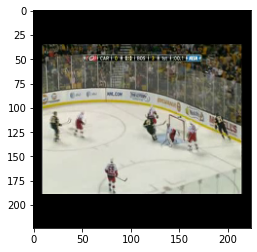

In [ ]:
plt.imshow(visible_frame[3])

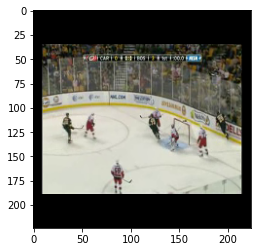

In [ ]:
plt.imshow(visible_frame[10])

In [ ]:
image_model = VGG16(include_top=True, weights='imagenet')

553467904/553467096 [==============================] - 5s 0us/step


In [ ]:
image_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
transfer_layer = image_model.get_layer('fc2')
image_model_transfer = Model(inputs=image_model.input, 
                             outputs=transfer_layer.output)

transfer_values_size = K.int_shape(transfer_layer.output)[1]


print("The input of the VGG16 net have dimensions:",K.int_shape(image_model.input)[1:3])

print("The output of the selecter layer of VGG16 net have dimensions: ", transfer_values_size)

The input of the VGG16 net have dimensions: (224, 224)
The output of the selecter layer of VGG16 net have dimensions:  4096


In [ ]:
def get_vgg16_model():
  image_model = VGG16(include_top=True, weights='imagenet')
  transfer_layer = image_model.get_layer('fc2')
  vgg16_model = Model(inputs=image_model.input, 
                              outputs=transfer_layer.output)
  
  return vgg16_model

In [ ]:
def get_transfer_values(current_dir, file_name):
    
    # Pre-allocate input-batch-array for images.
    shape = (_images_per_file,) + img_size_touple + (3,)
    
    image_batch = np.zeros(shape=shape, dtype=np.float16)
    
    image_batch = get_frames(current_dir, file_name)
      
    # Pre-allocate output-array for transfer-values.
    # Note that we use 16-bit floating-points to save memory.
    shape = (_images_per_file, transfer_values_size)
    transfer_values = np.zeros(shape=shape, dtype=np.float16)

    transfer_values = \
            image_model_transfer.predict(image_batch)
            
    return transfer_values

In [ ]:
def proces_transfer(vid_names, in_dir, labels):
    
    count = 0
    
    tam = len(vid_names)
    
    # Pre-allocate input-batch-array for images.
    shape = (_images_per_file,) + img_size_touple + (3,)
    
    while count<tam:
        
        video_name = vid_names[count]
        
        image_batch = np.zeros(shape=shape, dtype=np.float16)
    
        image_batch = get_frames(in_dir, video_name)
        
         # Note that we use 16-bit floating-points to save memory.
        shape = (_images_per_file, transfer_values_size)
        transfer_values = np.zeros(shape=shape, dtype=np.float16)
        
        transfer_values = \
            image_model_transfer.predict(image_batch)
         
        labels1 = labels[count]
        
        aux = np.ones([20,2])
        
        labelss = labels1*aux
        
        yield transfer_values, labelss
        
        count+=1

In [ ]:
def make_files(n_files):
    
    gen = proces_transfer(names_training, in_dir, labels_training)

    numer = 1

    # Read the first chunk to get the column dtypes
    chunk = next(gen)

    row_count = chunk[0].shape[0]
    row_count2 = chunk[1].shape[0]
    
    with h5py.File('prueba.h5', 'w') as f:
    
        # Initialize a resizable dataset to hold the output
        maxshape = (None,) + chunk[0].shape[1:]
        maxshape2 = (None,) + chunk[1].shape[1:]
    
    
        dset = f.create_dataset('data', shape=chunk[0].shape, maxshape=maxshape,
                                chunks=chunk[0].shape, dtype=chunk[0].dtype)
    
        dset2 = f.create_dataset('labels', shape=chunk[1].shape, maxshape=maxshape2,
                                 chunks=chunk[1].shape, dtype=chunk[1].dtype)
    
         # Write the first chunk of rows
        dset[:] = chunk[0]
        dset2[:] = chunk[1]

        for chunk in gen:
            
            if numer == n_files:
            
                break

            # Resize the dataset to accommodate the next chunk of rows
            dset.resize(row_count + chunk[0].shape[0], axis=0)
            dset2.resize(row_count2 + chunk[1].shape[0], axis=0)

            # Write the next chunk
            dset[row_count:] = chunk[0]
            dset2[row_count:] = chunk[1]

            # Increment the row count
            row_count += chunk[0].shape[0]
            row_count2 += chunk[1].shape[0]
            
            print_progress(numer, n_files)
        
            numer += 1

In [ ]:
def make_files_test(n_files):
    
    gen = proces_transfer(names_test, in_dir, labels_test)

    numer = 1

    # Read the first chunk to get the column dtypes
    chunk = next(gen)

    row_count = chunk[0].shape[0]
    row_count2 = chunk[1].shape[0]
    
    with h5py.File('pruebavalidation.h5', 'w') as f:
    
        # Initialize a resizable dataset to hold the output
        maxshape = (None,) + chunk[0].shape[1:]
        maxshape2 = (None,) + chunk[1].shape[1:]
    
    
        dset = f.create_dataset('data', shape=chunk[0].shape, maxshape=maxshape,
                                chunks=chunk[0].shape, dtype=chunk[0].dtype)
    
        dset2 = f.create_dataset('labels', shape=chunk[1].shape, maxshape=maxshape2,
                                 chunks=chunk[1].shape, dtype=chunk[1].dtype)
    
         # Write the first chunk of rows
        dset[:] = chunk[0]
        dset2[:] = chunk[1]

        for chunk in gen:
            
            if numer == n_files:
            
                break

            # Resize the dataset to accommodate the next chunk of rows
            dset.resize(row_count + chunk[0].shape[0], axis=0)
            dset2.resize(row_count2 + chunk[1].shape[0], axis=0)

            # Write the next chunk
            dset[row_count:] = chunk[0]
            dset2[row_count:] = chunk[1]

            # Increment the row count
            row_count += chunk[0].shape[0]
            row_count2 += chunk[1].shape[0]
            
            print_progress(numer, n_files)
        
            numer += 1

In [ ]:
training_set = int(len(names)*0.8)
test_set = int(len(names)*0.2)

names_training = names[0:training_set]
names_test = names[training_set:]

labels_training = labels[0:training_set]
labels_test = labels[training_set:]

In [ ]:
make_files(training_set)

- Progress: 99.9%

In [ ]:
make_files_test(test_set)

- Progress: 99.5%

In [ ]:
def process_alldata_training():
    
    joint_transfer=[]
    frames_num=20
    count = 0
    
    with h5py.File('prueba.h5', 'r') as f:
            
        X_batch = f['data'][:]
        y_batch = f['labels'][:]

    for i in range(int(len(X_batch)/frames_num)):
        inc = count+frames_num
        joint_transfer.append([X_batch[count:inc],y_batch[count]])
        count =inc
        
    data =[]
    target=[]
    
    for i in joint_transfer:
        data.append(i[0])
        target.append(np.array(i[1]))
        
    return data, target

In [ ]:
def process_alldata_test():
    
    joint_transfer=[]
    frames_num=20
    count = 0
    
    with h5py.File('pruebavalidation.h5', 'r') as f:
            
        X_batch = f['data'][:]
        y_batch = f['labels'][:]

    for i in range(int(len(X_batch)/frames_num)):
        inc = count+frames_num
        joint_transfer.append([X_batch[count:inc],y_batch[count]])
        count =inc
        
    data =[]
    target=[]
    
    for i in joint_transfer:
        data.append(i[0])
        target.append(np.array(i[1]))
        
    return data, target

In [ ]:
data, target = process_alldata_training()

In [ ]:
data_test, target_test = process_alldata_test()

In [ ]:
chunk_size = 4096
n_chunks = 20
rnn_size = 512

model = Sequential()
model.add(LSTM(rnn_size, input_shape=(n_chunks, chunk_size)))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [ ]:
def get_lstm_model():  
  chunk_size = 4096
  n_chunks = 20
  rnn_size = 512

  model = Sequential()
  model.add(LSTM(rnn_size, input_shape=(n_chunks, chunk_size)))
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               9439232   
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                51250     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0

In [ ]:
epoch = 200
batchS = 500

model.fit(np.array(data[0:750]), np.array(target[0:750]), epochs=epoch,
                    validation_data=(np.array(data[750:]), np.array(target[750:])), 
                    batch_size=batchS, verbose=2)

Epoch 1/200
2/2 - 20s - loss: 0.3499 - accuracy: 0.4773 - val_loss: 0.3292 - val_accuracy: 0.4600
Epoch 2/200
2/2 - 18s - loss: 0.2901 - accuracy: 0.5013 - val_loss: 0.2619 - val_accuracy: 0.5400
Epoch 3/200
2/2 - 13s - loss: 0.2693 - accuracy: 0.5013 - val_loss: 0.2481 - val_accuracy: 0.4600
Epoch 4/200
2/2 - 12s - loss: 0.2511 - accuracy: 0.4987 - val_loss: 0.2640 - val_accuracy: 0.4600
Epoch 5/200
2/2 - 11s - loss: 0.2547 - accuracy: 0.4987 - val_loss: 0.2462 - val_accuracy: 0.9400
Epoch 6/200
2/2 - 12s - loss: 0.2490 - accuracy: 0.7227 - val_loss: 0.2474 - val_accuracy: 0.5400
Epoch 7/200
2/2 - 12s - loss: 0.2551 - accuracy: 0.5013 - val_loss: 0.2418 - val_accuracy: 0.5400
Epoch 8/200
2/2 - 11s - loss: 0.2451 - accuracy: 0.5480 - val_loss: 0.2475 - val_accuracy: 0.4600
Epoch 9/200
2/2 - 12s - loss: 0.2450 - accuracy: 0.4987 - val_loss: 0.2433 - val_accuracy: 0.4600
Epoch 10/200
2/2 - 11s - loss: 0.2402 - accuracy: 0.5000 - val_loss: 0.2305 - val_accuracy: 0.8800
Epoch 11/200
2/2 - 

In [ ]:
result = model.evaluate(np.array(data_test), np.array(target_test))

In [ ]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

In [ ]:
# plt.plot(model.history.history['accuracy'])
# plt.plot(model.history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig('destination_path.eps', format='eps', dpi=1000)
# plt.show()

# # # summarize history for loss
# # plt.plot(model.history['loss'])
# # plt.plot(model.history['val_loss'])
# # plt.title('model loss')
# # plt.ylabel('loss')
# # plt.xlabel('epoch')
# # plt.legend(['train', 'validation'], loc='upper left')
# # plt.savefig('destination_path1.eps', format='eps', dpi=1000)
# # plt.show()

In [ ]:
# saving the model 

import pickle 
# pickle_out = open("drive/MyDrive/CMP-258 Project/violence_det.pkl", mode = "wb") 
# pickle.dump(history, pickle_out) 
# pickle_out.close()

pickle.dump(model, open("/content/drive/MyDrive/CMP-258 Project/violence_det.pkl", 'wb'))


In [ ]:
import os
import absl
import datetime
import tensorflow as tf
import tensorflow_transform as tft

from tfx.components.trainer.executor import TrainerFnArgs
from tfx.components.trainer.fn_args_utils import DataAccessor
from tfx_bsl.tfxio import dataset_options

from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping


def _input_fn(file_pattern: List[Text],
              data_accessor: DataAccessor,
              tf_transform_output: tft.TFTransformOutput,
              batch_size: int = 200) -> tf.data.Dataset:

  return data_accessor.tf_dataset_factory(
      file_pattern,
      dataset_options.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_transformed_name(_LABEL_KEY)),
      tf_transform_output.transformed_metadata.schema)


def _build_model(weights='imagenet'):
    # create the base pre-trained model
    base_model = InceptionV3(weights=weights, include_top=False)

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    # and a logistic layer
    predictions = Dense(2, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in model.layers[:-2]:
        layer.trainable = False

    # compile the model (should be done *after* setting layers to non-trainable)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



def run_fn(fn_args: TrainerFnArgs):

  tf_transform_output = tft.TFTransformOutput(fn_args.transform_output)

  train_dataset = _input_fn(fn_args.train_files, fn_args.data_accessor, 
                            tf_transform_output, 40)
  eval_dataset = _input_fn(fn_args.eval_files, fn_args.data_accessor, 
                           tf_transform_output, 40)
  
  model = _build_model()

  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=fn_args.model_run_dir, update_freq='batch')
  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps,
      callbacks=[tensorboard_callback])
  
  signatures = {
      'serving_default':
          _get_serve_tf_examples_fn(model,
                                    tf_transform_output).get_concrete_function(
                                        tf.TensorSpec(
                                            shape=[None],
                                            dtype=tf.string,
                                            name='examples')),
  }
  model.save(fn_args.serving_model_dir, save_format='tf', signatures=signatures
